In [1]:
%matplotlib inline
import numpy as np

import matplotlib.animation as anim
import matplotlib.pyplot as plt
from vortex import *

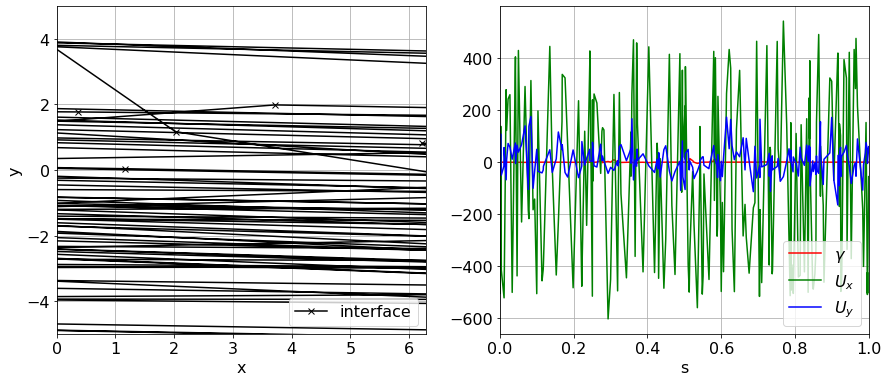

In [2]:
ntimes=500
dt=0.02
sim=Simulation(npoints=200,init_height=0.2,atwood=0.7,alpha=-0.2,delta_square=0.05)

# cosmetics
plt.rcParams.update({'font.size': 16})
fig,alist = plt.subplots(1,2,figsize=(12,5))
fig.subplots_adjust(left=0.05, bottom=0.08, right=0.99, top=0.99, wspace=None, hspace=None)

# plasma box
alist[0].set_xlim(0., 2*np.pi)
alist[0].set_ylim(-5.,5.)
alist[0].set_xlabel('x')
alist[0].set_ylabel('y')

#particle phase-space
alist[1].set_xlim(0.,1.)
alist[1].set_xlabel('s')

# definition of plots
inter, = alist[0].plot([],[],'-xk',label='interface')
gamma, = alist[1].plot([],[],'-r',label='$\gamma$')
u, = alist[1].plot([],[],'-g',label='$U_x$')
v, = alist[1].plot([],[],'-b',label='$U_y$')

plist=(inter,gamma,u,v)

for a in alist:
    a.grid()
    a.set_autoscale_on
    a.legend(loc='lower right')

def init():
    for e in plist:
        e.set_data([],[])
    return plist

def animate(i):
    global sim, fig, alist, dt
    
    gmax=int(max(np.floor(np.max(sim.vs.gamma)),1))
    for k in range(gmax):
        sim.evolve(dt/gmax)
    inter.set_data(sim.vs.x,sim.vs.y)
    gamma.set_data(sim.vs.arc/sim.vs.length,sim.vs.gamma)
    u.set_data(sim.vs.arc/sim.vs.length,sim.vs.u)
    v.set_data(sim.vs.arc/sim.vs.length,sim.vs.v)
    
    # axis cosmetics
    for a in alist:
        a.relim()
        a.autoscale_view()
    
    return plist

ani = anim.FuncAnimation(fig,animate,frames=ntimes,interval=10,blit=True,init_func=init)

ani.save('tayleigh-raylor.mp4',fps=24,extra_args=['-vcodec','libx264'])
plt.show()